In [39]:

import numpy as np

# Cargar los datos directamente en un array de NumPy
individuo = np.loadtxt('iris1.txt', delimiter=',')

# pesos    se pueden cambiar (Se colocaron 3 sentroides por que son 3 clases los de la iris)

    #iris:   setosa,versicolor,virginica
w =np.array( [[5.06, 5.936, 6.588], # pesos para x1
              [3.418, 2.77, 2.974], # pesos para x2
              [1.464, 4.26, 5.552], # pesos para x3
              [0.244, 1.326,2.026], # pesos para x4
                        ])
# Parámetro de aprendizaje
pa = 0.3

# Número de épocas
num_epocas = 500

# Tamaño de la matriz de pesos
num_neuronas = w.shape[1]  # 3 neuronas
longitud = num_neuronas - 1  # 4 (índice máximo)

for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    clasificaciones = []
    for i in range(len(individuo)):
        #print(f"\nProcesando individuo {i}: {individuo[i]}")
        
        # 1. Calcular distancias euclidianas entre el individuo y todas las neuronas
        distancias = []
        for j in range(num_neuronas):
            dx = w[0, j] - individuo[i, 0]
            dy = w[1, j] - individuo[i, 1]
            dz = w[2, j] - individuo[i, 2]
            da = w[3, j] - individuo[i, 3]
            D = dx**2 + dy**2 + dz**2 + da**2  # Distancia euclidiana al cuadrado
            distancias.append(D)
        
      # print("Distancias calculadas:", distancias)
        
        # 2. Encontrar la neurona ganadora (menor distancia)
        indice_min = np.argmin(distancias)
        valor_min = distancias[indice_min]
        #print(f"Neurona ganadora: índice {indice_min}, distancia {valor_min:.4f}")
        clasificaciones.append(indice_min)
        
        # 3. Actualizar pesos: neurona ganadora y sus vecinas
        if indice_min == 0:
         #  print("Caso: neurona ganadora es la primera (índice 0)")
            # Actualizar neurona ganadora (0) y su vecina derecha (1)
            for k in [0, 1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                w[2, k] += pa * (individuo[i, 2] - w[2, k])
                w[3, k] += pa * (individuo[i, 3] - w[3, k])
        elif indice_min == longitud:
       #    print(f"Caso: neurona ganadora es la última (índice {longitud})")
            # Actualizar neurona ganadora (longitud) y su vecina izquierda (longitud-1)
            for k in [longitud, longitud-1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                w[2, k] += pa * (individuo[i, 2] - w[2, k])
                w[3, k] += pa * (individuo[i, 3] - w[3, k])
        else:
          # print(f"Caso: neurona ganadora es intermedia (índice {indice_min})")
            # Actualizar neurona ganadora y sus dos vecinas (izquierda y derecha)
            for k in [indice_min-1, indice_min, indice_min+1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                w[2, k] += pa * (individuo[i, 2] - w[2, k])
                w[3, k] += pa * (individuo[i, 3] - w[3, k])
        
       #print("Pesos actualizados:")
       #print(w)

print("\n--- Pesos finales ---")
print(w)

# Convertimos a arreglo de NumPy por si acaso
clasificaciones = np.array(clasificaciones)

# Contar cuántos elementos se asignaron a cada neurona
asignaciones = [np.sum(clasificaciones == i) for i in range(num_neuronas)]

print("\n--- Clasificación final de elementos por neurona ---")
print(f"Neurona 0 (Setosa):      {asignaciones[0]} elementos")
print(f"Neurona 1 (Versicolor):  {asignaciones[1]} elementos")
print(f"Neurona 2 (Virginica):   {asignaciones[2]} elementos")


--- Época 1 ---

--- Época 2 ---

--- Época 3 ---

--- Época 4 ---

--- Época 5 ---

--- Época 6 ---

--- Época 7 ---

--- Época 8 ---

--- Época 9 ---

--- Época 10 ---

--- Época 11 ---

--- Época 12 ---

--- Época 13 ---

--- Época 14 ---

--- Época 15 ---

--- Época 16 ---

--- Época 17 ---

--- Época 18 ---

--- Época 19 ---

--- Época 20 ---

--- Época 21 ---

--- Época 22 ---

--- Época 23 ---

--- Época 24 ---

--- Época 25 ---

--- Época 26 ---

--- Época 27 ---

--- Época 28 ---

--- Época 29 ---

--- Época 30 ---

--- Época 31 ---

--- Época 32 ---

--- Época 33 ---

--- Época 34 ---

--- Época 35 ---

--- Época 36 ---

--- Época 37 ---

--- Época 38 ---

--- Época 39 ---

--- Época 40 ---

--- Época 41 ---

--- Época 42 ---

--- Época 43 ---

--- Época 44 ---

--- Época 45 ---

--- Época 46 ---

--- Época 47 ---

--- Época 48 ---

--- Época 49 ---

--- Época 50 ---

--- Época 51 ---

--- Época 52 ---

--- Época 53 ---

--- Época 54 ---

--- Época 55 ---

--- Época 56 ---



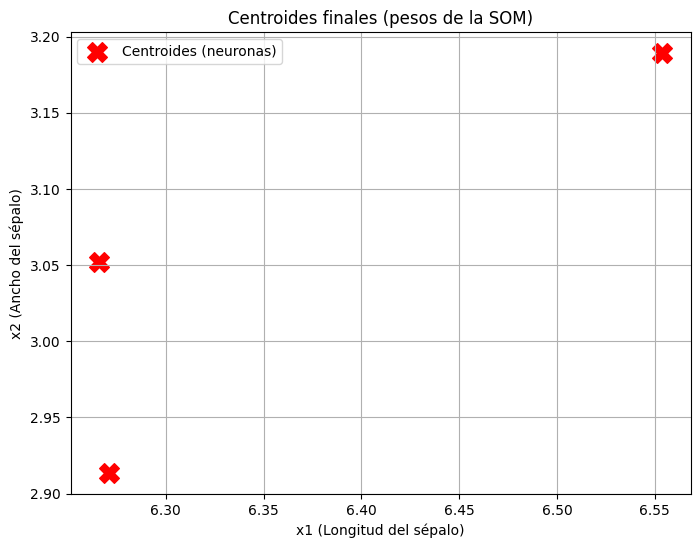

In [36]:
import matplotlib.pyplot as plt

# Mostrar los centroides finales
plt.figure(figsize=(8, 6))
plt.scatter(w[0, :], w[1, :], c='red', marker='X', s=200, label='Centroides (neuronas)')
plt.title("Centroides finales (pesos de la SOM)")
plt.xlabel("x1 (Longitud del sépalo)")
plt.ylabel("x2 (Ancho del sépalo)")
plt.legend()
plt.grid()
plt.show()

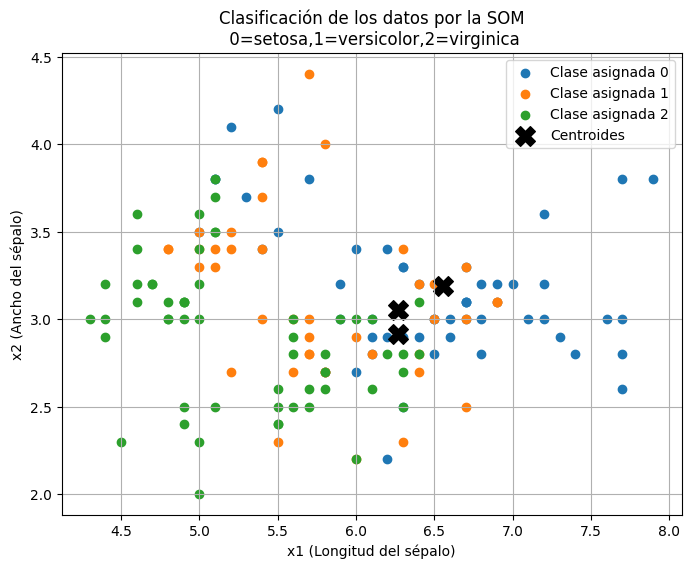

In [37]:
# Visualizar la clasificación de cada punto
clasificaciones = np.array(clasificaciones)
plt.figure(figsize=(8, 6))
for i in range(num_neuronas):
    puntos = individuo[clasificaciones == i]
    plt.scatter(puntos[:, 0], puntos[:, 1], label=f'Clase asignada {i}')
plt.scatter(w[0, :], w[1, :], c='black', marker='X', s=200, label='Centroides')
plt.title("Clasificación de los datos por la SOM\n 0=setosa,1=versicolor,2=virginica")
plt.xlabel("x1 (Longitud del sépalo)")
plt.ylabel("x2 (Ancho del sépalo)")
plt.legend()
plt.grid()
plt.show()

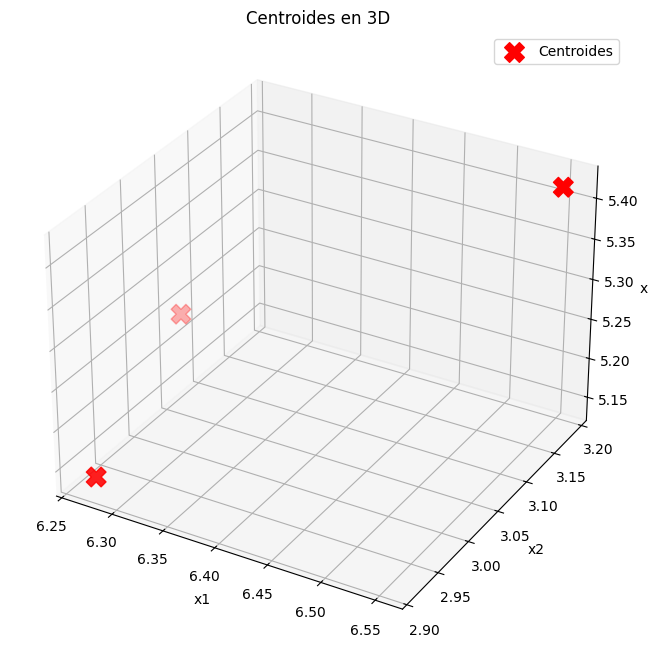

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w[0, :], w[1, :], w[2, :], c='red', marker='X', s=200, label='Centroides')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title("Centroides en 3D")
plt.legend()
plt.show()
